
# SPAM CLASSIFICATION USING NAIVE BAYES
# AHMED HUMAYUN



# PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

- A spam classifier was built using the probability theorem called Bayes Theorem-

![](1.png)

- If following dataset has a message with a unique set of words in the sequence (w1,w2,w3,...wn), we attempt to find -

![](2.png)

The above expression can be simplified if based on the assumption that all the words occurance is independent of each other words- 

![](3.png)

Hence for successful classificatin we need to determine which is greater-

![](4.png)

Ref - The Elements of Statistical Learning - Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie

Dataset - https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1: IMPORTING DATASET

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# 2: DATASET VISUALIZATION

In [7]:
# Most popular ham/spam messages 
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: re : contact info  glenn ,  please , ...    2
1     1368   1368  Subject: all graphics software available , che...    1

In [8]:
# getting the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [9]:
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


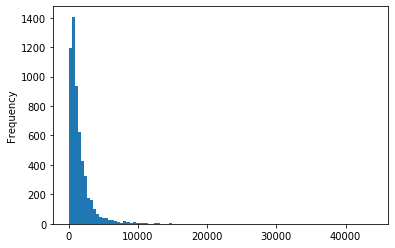

In [10]:
spam_df['length'].plot(bins=100, kind='hist') 

In [11]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [12]:
# Finding the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [48]:
# Separating the messages into spam and ham

In [13]:
ham = spam_df[spam_df['spam']==0]

In [14]:
spam = spam_df[spam_df['spam']==1]

In [15]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [16]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


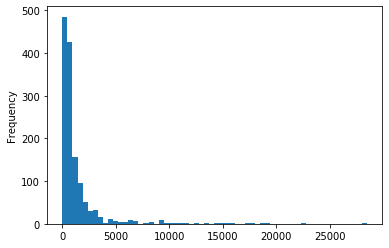

In [17]:
spam['length'].plot(bins=60, kind='hist') 

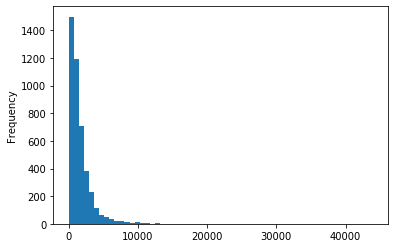

In [18]:
ham['length'].plot(bins=60, kind='hist') 

In [19]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [20]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


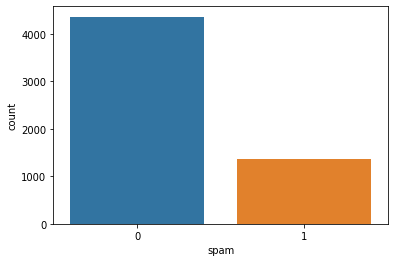

In [21]:
sns.countplot(spam_df['spam'], label = "Count") 

# 3: CREATEING TESTING AND TRAINING DATASET/DATA CLEANING

# 3.1 REMOVING PUNCTUATION

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [24]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [25]:
# Joining the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

# 3.2 REMOVING STOPWORDS

In [26]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [28]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [29]:
Test_punc_removed_join_clean # Only important words are left

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

# 3.3 EXERCISE: COUNT VECTORIZER EXAMPLE 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [31]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [32]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


Applying the Previous Three Processes To Our Spam/Ham Example

In [33]:
# Defining a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [34]:
# Testing the newly added function
spam_df_clean = spam_df['text'].apply(message_cleaning)

KeyboardInterrupt: 

In [ ]:
print(spam_df_clean[0])

In [82]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

APPLYING COUNT VECTORIZER TO OUR MESSAGES LIST

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Defining the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [ ]:
print(vectorizer.get_feature_names())


In [90]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [91]:
spamham_countvectorizer.shape

(5728, 37229)

# 4: MODEL TRAINING 

In [92]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [94]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [100]:
X = spamham_countvectorizer
y = label

In [101]:
X.shape

(5728, 37229)

In [102]:
y.shape

(5728,)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

# 5: MODEL EVALUATION

In [106]:
from sklearn.metrics import classification_report, confusion_matrix


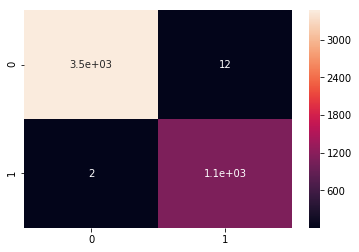

In [107]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

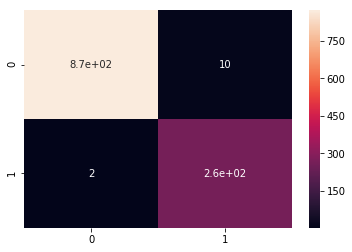

In [108]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [109]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       881
          1       0.96      0.99      0.98       265

avg / total       0.99      0.99      0.99      1146



# 6: ADDING ADDITIONAL FEATURE TF-IDF

- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [142]:
spamham_countvectorizer

<5728x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [143]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 37229)


In [144]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 3638)	0.017223322243491098
  (0, 23369)	0.118508643434226
  (0, 18841)	0.13854196464928686
  (0, 10065)	0.07179540742040964
  (0, 17696)	0.08994844691767893
  (0, 21140)	0.10887020038606904
  (0, 27986)	0.06591875520600377
  (0, 16674)	0.07589064603185605
  (0, 28110)	0.11014658587128427
  (0, 9296)	0.16201763950655423
  (0, 21654)	0.11194202104978927
  (0, 15429)	0.06469325106427357
  (0, 32602)	0.11962021118089676
  (0, 18238)	0.043554647514359196
  (0, 18886)	0.13044694068717724
  (0, 16089)	0.09989038984521927
  (0, 8054)	0.11082209685254275
  (0, 20952)	0.25638370834223684
  (0, 32319)	0.11962021118089676
  (0, 31968)	0.118508643434226
  (0, 24838)	0.0889526018162803
  (0, 36025)	0.13193927309897757
  (0, 21431)	0.09506033522963935
  (0, 33037)	0.0949032879551913
  (0, 23040)	0.1086278114614957
  :	:
  (5727, 24818)	0.10165921849327718
  (5727, 21624)	0.0492955480245261
  (5727, 5729)	0.5517795052228944
  (5727, 30934)	0.05231956904321426
  (5727, 2828)	0.17444034391197472
 

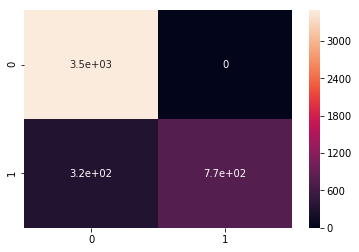

In [147]:
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [148]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       871
          1       0.27      0.27      0.27       275

avg / total       0.65      0.65      0.65      1146

